<a href="https://colab.research.google.com/github/anthu-Cyril/python_2024/blob/main/DECISION_TREE%2Cassign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# DECISION TREE

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler


In [ ]:
data_path = '/content/heart_disease.xlsx'
# Remove the trailing space from the sheet name
data = pd.read_excel(data_path, sheet_name='Heart_disease')

In [ ]:
# Check the first few rows to confirm data is loaded correctly
print(data.head(12))



    age     sex               cp  trestbps  chol    fbs           restecg  \
0    63    Male   typical angina       145   233   True    lv hypertrophy   
1    41    Male  atypical angina       135   203  False            normal   
2    57    Male     asymptomatic       140   192  False            normal   
3    52    Male   typical angina       118   186  False    lv hypertrophy   
4    57    Male     asymptomatic       110   201  False            normal   
5    66    Male     asymptomatic       160   228  False    lv hypertrophy   
6    56    Male      non-anginal       130   276  False            normal   
7    48    Male      non-anginal       110   211  False            normal   
8    57    Male  atypical angina       140   260   True            normal   
9    53    Male      non-anginal       155   175   True  st-t abnormality   
10   30  Female   typical angina       170   237  False  st-t abnormality   
11   66  Female   typical angina       150   226  False            normal   

In [ ]:
# Check data types to identify numeric columns
print(data.dtypes)

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object


In [ ]:
# Select only numeric columns for plotting
numeric_data = data.select_dtypes(include=[np.number])

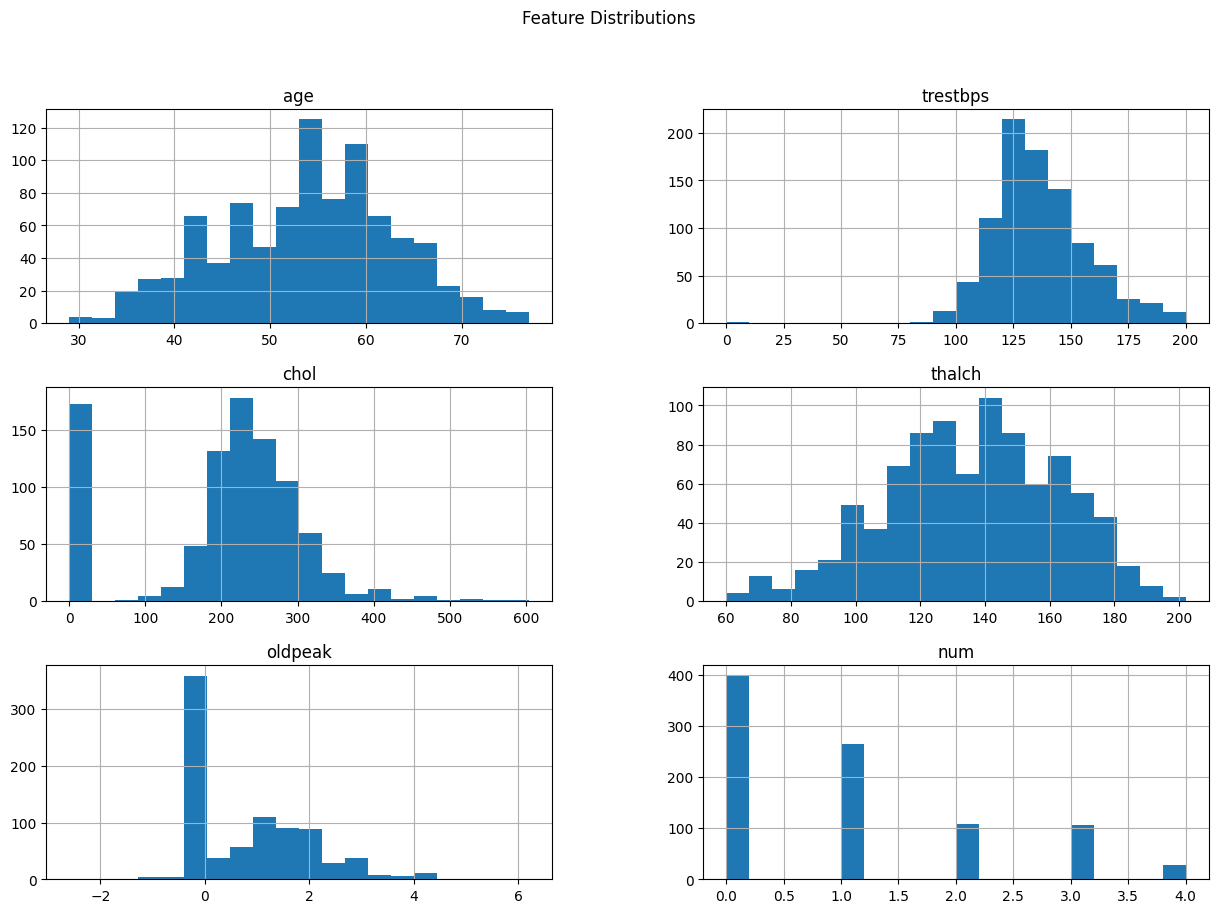

In [ ]:
# Check if there are numeric columns to plot
if numeric_data.shape[1] > 0:
    # Visualize the distribution of numerical features
    numeric_data.hist(bins=20, figsize=(15, 10))
    plt.suptitle('Feature Distributions')
    plt.show()
else:
    print("No numeric columns to plot.")

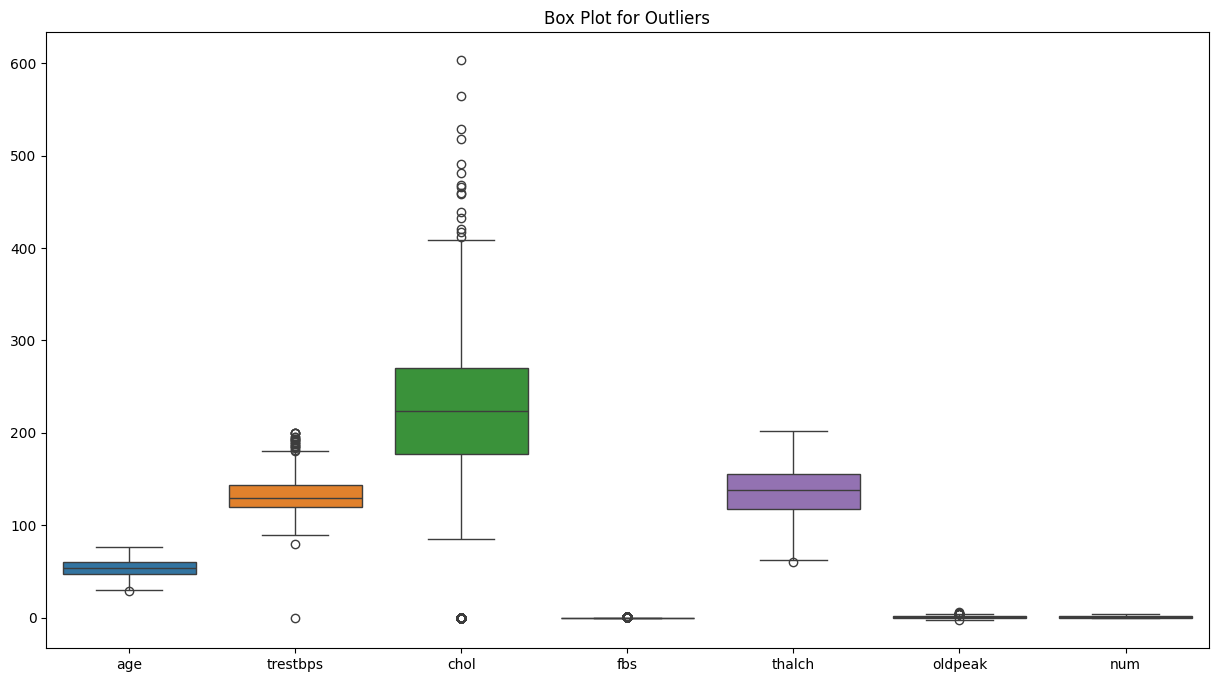

In [ ]:
# Box plot to check for outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=data)
plt.title('Box Plot for Outliers')
plt.show()

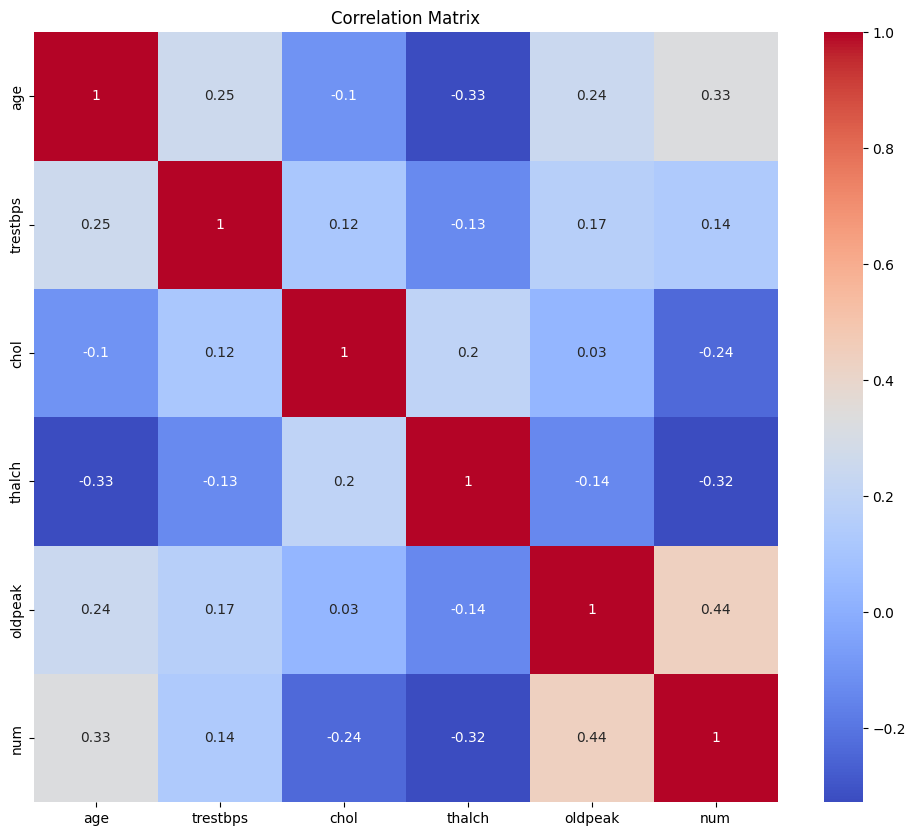

In [ ]:
# Correlation matrix for numerical features only
plt.figure(figsize=(12, 10))
numeric_data = data.select_dtypes(include=np.number)  # Select only numeric columns
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



In [ ]:
# 3. Feature Engineering

In [ ]:
# Handle categorical variables if any (using get_dummies for simplicity)
data = pd.get_dummies(data, drop_first=True)

In [ ]:
# Scale numerical features (if necessary)
scaler = StandardScaler()
numerical_columns = data.select_dtypes(include=np.number).columns.tolist()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [ ]:
# Display column names to identify the target column
print("Column Names:\n", data.columns)

Column Names:
 Index(['age', 'trestbps', 'chol', 'fbs', 'thalch', 'oldpeak', 'num',
       'sex_Male', 'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina',
       'restecg_normal', 'restecg_st-t abnormality', 'exang_True',
       'exang_FALSE', 'exang_TURE', 'slope_flat', 'slope_upsloping',
       'thal_normal', 'thal_reversable defect'],
      dtype='object')


In [ ]:
# Define features and target variable
X = data.drop('num', axis=1)  # Features (all columns except 'num')
y = data['num']               # Target (the 'num' column)

In [ ]:
# Confirm the shapes of X and y
print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (908, 19)
Target shape: (908,)


In [ ]:
# 4. Decision Tree Classification

In [ ]:
# Check unique values in the target variable to confirm it’s discrete
print("Unique values in target variable:", y.unique())

Unique values in target variable: [-0.8819769  -0.00770286  0.86657119  1.74084524  2.61511929]


In [ ]:
# Convert target variable to integer if it has continuous values but represents categories
if y.dtype != 'int' and y.nunique() <= 10:  # Assuming no more than 10 classes for heart disease
    y = y.round().astype(int)

In [ ]:
#  train-test split
from sklearn.model_selection import train_test_split

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the Decision Tree model
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
# Set the 'average' parameter to 'weighted' for multiclass classification
precision = precision_score(y_test, y_pred, average='weighted') # Changed line
recall = recall_score(y_test, y_pred, average='weighted') # Changed line
f1 = f1_score(y_test, y_pred, average='weighted') # Changed line
# Selecting all columns from predict_proba to get probabilities for all classes
roc_auc = roc_auc_score(y_test, dt_classifier.predict_proba(X_test), multi_class='ovr') # Changed line


print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC-AUC: {roc_auc}")

Accuracy: 0.45054945054945056
Precision: 0.4387847733455541
Recall: 0.45054945054945056
F1-Score: 0.4436379989720538
ROC-AUC: 0.5635053712839396


In [ ]:
# 5. Hyperparameter Tuning

In [ ]:
# Set up hyperparameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [ ]:
# Best model from grid search
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 10}


In [ ]:
# Evaluate the best model
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
# Set the 'average' parameter to 'weighted' for multiclass classification
precision_best = precision_score(y_test, y_pred_best, average='weighted') # Changed line
recall_best = recall_score(y_test, y_pred_best, average='weighted') # Changed line
f1_best = f1_score(y_test, y_pred_best, average='weighted') # Changed line
# Selecting all columns from predict_proba to get probabilities for all classes. Assuming it is a multi-class problem
roc_auc_best = roc_auc_score(y_test, best_model.predict_proba(X_test), multi_class='ovr') # Changed line


print(f"Tuned Model Accuracy: {accuracy_best}")
print(f"Tuned Model Precision: {precision_best}")
print(f"Tuned Model Recall: {recall_best}")
print(f"Tuned Model F1-Score: {f1_best}")
print(f"Tuned Model ROC-AUC: {roc_auc_best}")

Tuned Model Accuracy: 0.510989010989011
Tuned Model Precision: 0.4798067945126769
Tuned Model Recall: 0.510989010989011
Tuned Model F1-Score: 0.4899910908387117
Tuned Model ROC-AUC: 0.6307014000263137


 Result

1) Accuracy: 51.1%
The model correctly predicted about half of the instances.

2) Precision: 48.0%
Of all positive predictions made by the model, 48% were actually correct. This means there's a fair amount of incorrect positive predictions.

3) Recall: 51.1%
The model correctly identified 51.1% of all actual positive cases. It missed some positives, which affects its reliability.

4) F1-Score: 49.0%
This score balances precision and recall, indicating moderate performance overall. A score of 49.0% shows there's room for improvement.

5) ROC-AUC: 63.1%
The model's ability to distinguish between classes is moderately good. An AUC of 63.1% suggests that the model performs better than random guessing but is not yet highly effective.

Summary
Overall, the tuned model shows moderate performance but indicates areas for improvement in making more accurate predictions, especially in terms of precision and the F1-score.








In [ ]:
# 6. Model Evaluation and Analysis

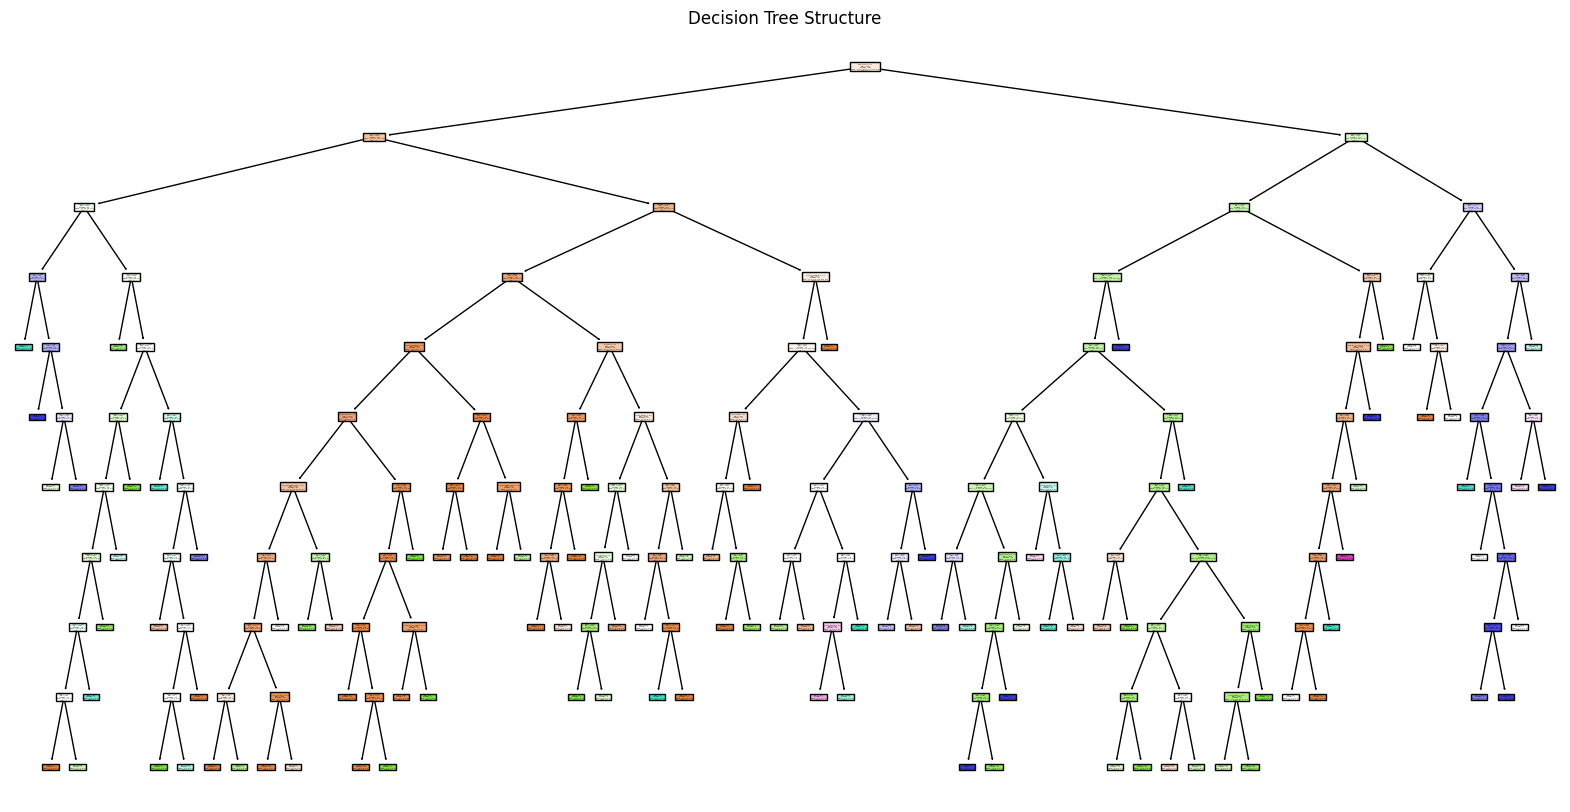

In [ ]:
# Assuming your target variable (y) has more than two unique classes,
# you need to adjust the class_names accordingly.

# Get the unique class labels from your training data
unique_classes = np.unique(y_train)  # Replace 'y_train' with your actual training target variable

# Create the class_names list dynamically
class_names = [str(class_label) for class_label in unique_classes]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_model, filled=True, feature_names=X.columns, class_names=class_names)  # Updated line
plt.title("Decision Tree Structure")
plt.show()

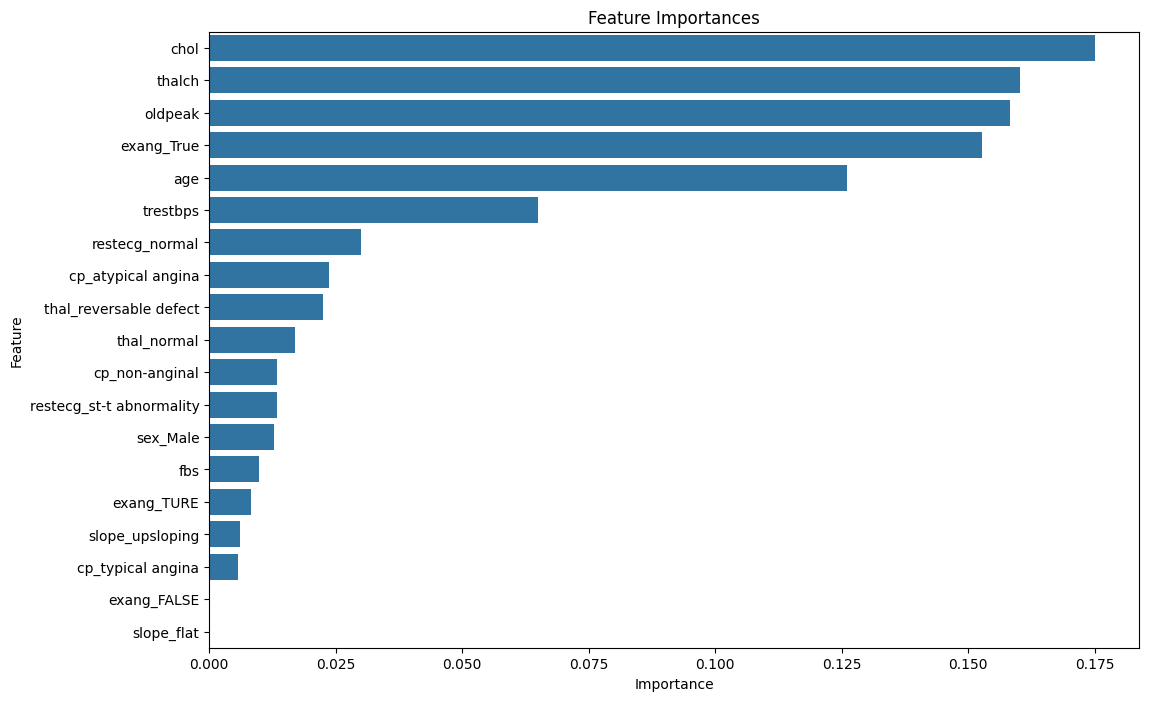

In [ ]:
# Feature importance plot
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': best_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()

# Interview Questions:

# 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

Common Hyperparameters of Decision Trees

1) max_depth:

Description: Limits the maximum depth of the trees

Effect:
Shallow Trees: Prevent overfitting, leading to higher bias but lower variance. They may underfit the data, failing to capture important patterns.
Deep Trees: Capture more complexity and nuances in the data but can lead to overfitting, where the model learns noise instead of the underlying distribution.

2) min_samples_split:

Description: The minimum number of samples required to split an internal node.
Effect:
Higher Values: Encourage more generalization by ensuring that splits occur only when there are enough samples, helping to avoid overfitting.
Lower Values: Allow for more splits, potentially leading to overfitting, especially in datasets with noise.

3) min_samples_leaf:

Description: The minimum number of samples that must be present in a leaf node.
Effect:
Higher Values: Create leaves with a minimum number of samples, which can smooth the model and reduce variance, leading to better generalization.
Lower Values: Allow for leaves with very few samples, increasing the risk of overfitting.

4)  max_features:

Description: The number of features to consider when looking for the best split.
Effect:
Lower Values: Can help to reduce overfitting by limiting the number of features considered, which adds randomness and diversity to the trees in ensemble methods (like Random Forests).
Higher Values: Increase the chance of capturing complex patterns but can also lead to overfitting.

5) criterion:

Description: The function used to measure the quality of a split (e.g., "gini" for Gini impurity or "entropy" for information gain).
Effect:
Different Criteria: May lead to different splits and hence different structures of the tree. The choice can impact the model’s performance depending on the nature of the data.

6) max_leaf_nodes:

Description: Limits the number of leaf nodes in the tree.
Effect:
Fewer Leaf Nodes: Simplifies the model and reduces overfitting by enforcing a cap on complexity.
More Leaf Nodes: Increases the complexity of the model and can capture more details, potentially improving accuracy at the risk of overfitting.

7) min_weight_fraction_leaf:

Description: Similar to min_samples_leaf, but it takes the weight of each sample into account.
Effect: Helps in cases where classes are imbalanced, ensuring that the model does not create splits that lead to leaves with very few weighted samples.

**Summary of Effects**

1) Bias-Variance Trade-off: Most hyperparameters affect the model’s bias and variance. Higher complexity generally leads to lower bias but higher variance (overfitting), while constraints reduce complexity and variance but can increase bias (underfitting).
2) Generalization: Proper tuning of these hyperparameters can significantly enhance the model's ability to generalize to unseen data.

**Conclusion**


Choosing the right hyperparameters for a decision tree model is crucial for balancing performance, generalization, and avoiding overfitting. It often requires a combination of domain knowledge, experimentation, and validation techniques such as cross-validation to find the optimal settings for a specific dataset.

# 2. What is the difference between the Label encoding and One-hot encoding?

Difference Between Label Encoding and One-Hot Encoding

Both Label Encoding and One-Hot Encoding are techniques used to convert categorical variables into a numerical format that can be used in machine learning models. However, they differ in their approaches and implications.
1. Label Encoding
Definition: Converts each category in a categorical feature into a unique integer label.
*   Example
For a categorical feature "Color" with categories:
"Red", "Blue", "Green"
The label encoding would be:
"Red" = 0
"Blue" = 1
"Green" = 2

Implications:
Ordinal Relationship: Implies an ordinal relationship among the categories, which may not exist (e.g., "Red" < "Blue" < "Green"), potentially misleading models that interpret the numeric values as having some sort of order.
Use Cases: Suitable for ordinal categorical variables where the order matters (e.g., "Low", "Medium", "High").


2. One-Hot Encoding
Definition: Converts each category into a new binary column, indicating the presence (1) or absence (0) of each category.
Example:
For the same feature "Color":
"Red" → [1, 0, 0]
"Blue" → [0, 1, 0]
"Green" → [0, 0, 1]
This results in three new columns:
Color_Red, Color_Blue, Color_Green

Implications:
No Ordinal Relationship: Avoids implying any ordinal relationship, as each category is represented independently.
Curse of Dimensionality: Increases the dimensionality of the dataset, especially if the categorical variable has many unique categories, which can lead to a sparse dataset.
Use Cases: Preferred for nominal categorical variables where no order exists (e.g., "Fruit" categories: "Apple", "Banana", "Orange").

**Conclusion**

In summary, the choice between label encoding and one-hot encoding depends on the nature of the categorical variable (ordinal vs. nominal) and the specific requirements of the machine learning model being used. Proper encoding ensures that the model interprets the categorical features correctly, enhancing its predictive performance.






